# Week 12 Homework

**1) In 250-500 words, write a thorough discussion of when to use ML and when not to. Do NOT go over the 500-word limit. It is essential to express this concisely. This should be informed by the Machine Learning for Business DataCamp course.**

Machine learning (ML) is a powerful tool that is typically used to identify causal relationships, make predictions about future events, and to identify and understand patterns in data. Even though ML offers significant insights and can be incredibly helpful, it should not be used in every scenario.

A number of factors must be considered when initially determining whether or not to begin a ML project or to apply ML techniques. These include understanding the business situation, the opportunities (and costs) in question, and the presence of actionable solutions. If the opportunity is too small or the cost is too large, ML is unlikely to be the best choice. Similarly, if at the end of an experiment of ML process there are not likely to be actionable items identified, ML should not be used. 

ML should also  not be performed first before data exploration, preprocessing, identifying business targets and desired outcomes, etc. The ML process also must start with adequate, high quality data. If you input bad data, there is no way to have a useful and appropriate ML model. 

Additionally, before ever starting a ML project, the target variables should be very clearly defined. In particular, attention should be paid to the desired predictions. Before starting a ML project, a determination of whether the desired parameters can actually be observed at all should be made. Furthermore, analysis should be carefully performed on the parameters in questions long before ML is started.  Those working directly on and with the ML team should have adequate knowledge and expertise in the topic at hand. 

Once the ML process has begun, testing should be performed at a reasonable time in the project. If the model is refined for too long without testing, it is less likely to have the desired impact on the business outcomes (in other words, don’t wait for the model to be as perfect as possible before moving on-time is important too). 

Finally, feature selection is vitally important for any ML project. It is important to choose variables that directly influence your target variable of choice; they should be variables that can be controlled and that the business or organization is involved in this early step. The data chosen should be readily available, new features should be added to the model iteratively and the model should be tested whenever it begins producing reasonable results. Without this information and these initialization steps, ML should not be performed.


### 2) Perform pre-processing on the Lending Club dataset from class. Clearly use markdown to indicate each pre-processing step you are using. Note: you should use at least three different techniques.

**Before preprocessing began, I wanted to look first at the NaNs in the dataset. In particular, I wanted to calculate the % of NaNs there were in each column. I also chose to look at the datatypes for each column and the dataframe itself.**

In [76]:
#importing all the usual things

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import plotly.express as px
from scipy import signal

#loading the data as a dataframe
df = pd.read_csv('loans_full_schema.csv')

#looking at the dataframe
df.head()

#looking at how many NaNs are present in each column
print((df.isna().sum())/len(df)*100)

#looking at column data types
print(df.dtypes)

df

emp_title                            8.33
emp_length                           8.17
state                                0.00
homeownership                        0.00
annual_income                        0.00
verified_income                      0.00
debt_to_income                       0.24
annual_income_joint                 85.05
verification_income_joint           85.45
debt_to_income_joint                85.05
delinq_2y                            0.00
months_since_last_delinq            56.58
earliest_credit_line                 0.00
inquiries_last_12m                   0.00
total_credit_lines                   0.00
open_credit_lines                    0.00
total_credit_limit                   0.00
total_credit_utilized                0.00
num_collections_last_12m             0.00
num_historical_failed_to_pay         0.00
months_since_90d_late               77.15
current_accounts_delinq              0.00
total_collection_amount_ever         0.00
current_installment_accounts      

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,NaN,NaN,NaN,...,A4,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,NaN,NaN,NaN,...,D3,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,107000.0,Source Verified,29.57,...,E2,Feb-2018,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,NaN,NaN,NaN,...,A1,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0


**1st Preprocessing Step: Deciding which NaN to remove and then doing so**

Based on the previous cell, I could group the columns with NaNs into several categories:
1) NaNs compose < 10% of the column: emp_title, emp_length, debt_to_income, months_since_last_credit_inquiry, num_accounts_120d_past_due
2) NaNs compose ~12% of column data: just months_since_last_delinq
3) NaNs compose >50% of column data: annual_income_joint, verification_income_joint, debt_to_income_joint, and months_since_90d_late

For categories 1 and 2, the column data is MOSTLY composed of data and NOT NaNs. So, I decided to keep all of those.

For category 3, months_since_last_delinq could be very telling so even though NaNs make up ~57% of the column data
I'm keeping it for now. 

Verification_income_joint has over 85% NaNs and is a bit redundant. I think we can safely remove that column. 

Annual_income_joint, debt_to_income_joint, and months_since_90d_late are all potentially important but have SO MUCH
missing data, it makes sense at this point to tag those as places to improve data collection and leave them out
for now. This data could potentially be partitioned separately to investigate relationships and then be used to justify the collection of more of these types of data. This goes along with the idea of garbage in = garbage out.

In [78]:
#removing columns with 75%+ NaN in the column data. Would tag joint income columns for priority in additional data collection.
df_less_nan = df.drop(['annual_income_joint', 'verification_income_joint','debt_to_income_joint',  'months_since_90d_late', 'months_since_last_credit_inquiry', 'num_accounts_120d_past_due'], axis=1)
df_less_nan

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,months_since_last_delinq,earliest_credit_line,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,0,38.0,2001,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,0,NaN,1996,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,0,28.0,2006,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,0,NaN,2007,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,0,NaN,2008,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,0,NaN,2008,...,A4,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,4,9.0,1994,...,D3,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,2,6.0,2004,...,E2,Feb-2018,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,0,NaN,1999,...,A1,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0


**Preprocessing Step 2: Encoding Categorical data as numeric data-using map to simplify the verified_income column. I chose to collapse down to 2 entries-verified (either source verified or verified; 1) or not verified (0).**

In [79]:
verified_map = {'Source Verified':1, 'Verified':1, 'Not Verified':0}
df_less_nan['verified_income'] = df_less_nan['verified_income'].map(verified_map)
df_less_nan

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,months_since_last_delinq,earliest_credit_line,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,1,18.01,0,38.0,2001,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,0,5.04,0,NaN,1996,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,1,21.15,0,28.0,2006,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,0,10.16,0,NaN,2007,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,1,57.96,0,NaN,2008,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,1,22.28,0,NaN,2008,...,A4,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,director,8.0,PA,MORTGAGE,121000.0,1,32.38,4,9.0,1994,...,D3,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,1,45.26,2,6.0,2004,...,E2,Feb-2018,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,manager,1.0,WI,MORTGAGE,80000.0,1,11.99,0,NaN,1999,...,A1,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0


**Preprocessing Step 3: Using One Hot Encoding to convert other categorical data to numeric data**

In [80]:
#Check on data types in the df created above that removes columns with > 100 NaN values
df_less_nan.dtypes

#Converting categorical data to numerical data
df_cat_encoded = pd.get_dummies(df_less_nan[['state', 'homeownership', 'loan_purpose', 'application_type']])
df_cat_encoded
#df_cat_encoded.columns

#This could then be added to my main dataframe-df_less_nan


#df_less_nan
#item_counts = df["homeownership"].unique()
#item_counts

,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,...,loan_purpose_house,loan_purpose_major_purchase,loan_purpose_medical,loan_purpose_moving,loan_purpose_other,loan_purpose_renewable_energy,loan_purpose_small_business,loan_purpose_vacation,application_type_individual,application_type_joint
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9997,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


### 3) Create a correlation matrix with a heatmap for the features in the Lending Club dataset. Use markdown to write about your takeaways in under 250 words.

In [81]:
#Creating the correlation matrix
corr_Matrix = df_less_nan.corr()
print(corr_Matrix)



                              emp_length  annual_income  verified_income  \
emp_length                      1.000000       0.096469        -0.011419   
annual_income                   0.096469       1.000000         0.045089   
verified_income                -0.011419       0.045089         1.000000   
debt_to_income                  0.026157      -0.180445         0.027511   
delinq_2y                       0.008242       0.052236         0.013202   
months_since_last_delinq        0.028790      -0.040392        -0.030370   
earliest_credit_line           -0.234408      -0.156001         0.059494   
inquiries_last_12m              0.003753       0.090119         0.093326   
total_credit_lines              0.133472       0.210163        -0.013161   
open_credit_lines               0.067415       0.176788         0.002714   
total_credit_limit              0.147594       0.516703         0.072999   
total_credit_utilized           0.019694       0.406370         0.057215   
num_collecti

<AxesSubplot:>

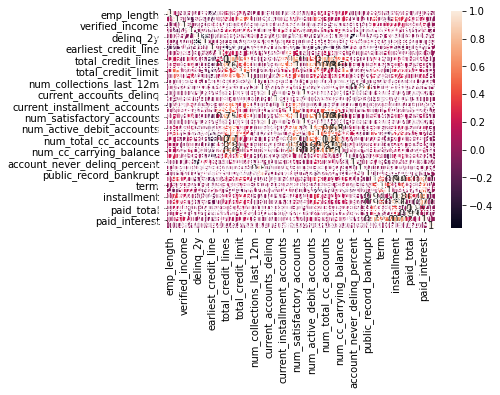

In [82]:
#visualizing the correlation matrix using a heatmap
sns.heatmap(corr_Matrix, annot = True)
#plt.show()

**As shown, the heatmap for the correlation matrix is incredibly difficult to read. In the following cells, I make an attempt to create something more easily interpretable. One obvious feature is that the vast majority of the correlation matrix represents low correlation values, implying a pretty small number of correlated parameters.**

**In the following heatmap, I looked at the absolute value of the correlation matrix. This just makes the plot a bit easier to read but doesn't really change any conclusions.**

<AxesSubplot:>

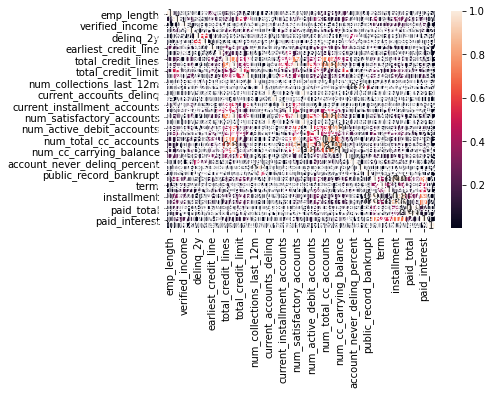

In [147]:
#visualizing the correlation matrix using a heatmap
sns.heatmap(abs(corr_Matrix), annot = True)
#plt.show()

**The final thing I tried in an effort to clean up the heatmap was to limit the values shown to only those with a correlation value greater than 0.5. Again, it is clear that there only a few highly correlation parameters (greater than ~0.8). These parameters will be important to identify because ideally, we don't want to include highly correlated variables in our eventual ML model. This would be a next step: identify the highly correlated variables, document those variables, and remove the ones that are least likely to be useful in a ML model.**

<AxesSubplot:>

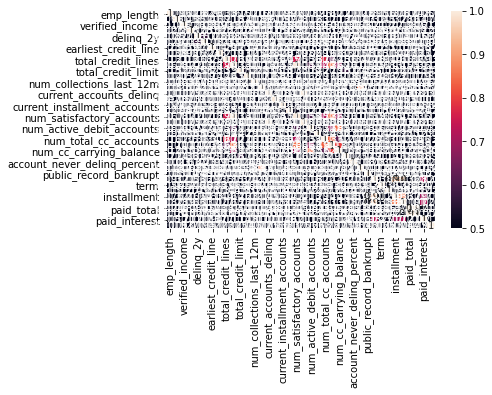

In [148]:
#visualizing the correlation matrix using a heatmap
sns.heatmap(abs(corr_Matrix), annot = True, vmin = 0.5)
#plt.show()

### Interpretation of the Correlation Matrix heatmap


**4) Create a histogram showing the frequency of loan_amounts. Describe what you see. Pay special attention to bin sizes, and clearly describe how you chose your bin sizes.**

<AxesSubplot:xlabel='loan_amount', ylabel='Count'>

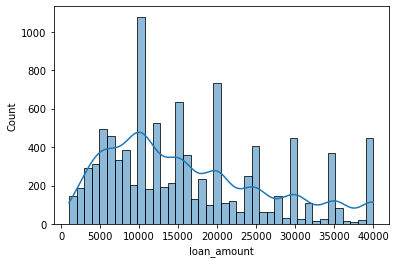

In [90]:
sns.histplot(data=df_less_nan, x='loan_amount', bins=40, kde=True)

**I chose my bin sizes based on a) what logically made sense (they represent 1000 dollar increments here) and b) what produced a reasonable looking histogram that neither cut out too much data not included so much that it lost its interpretability. There are formulas out there that allow you to choose bin size differently, but the choices I made seemed to make the most physical sense.**

### 5) Create a new column called region that uses a lambda and shows which part of the US someone lives in, split up into Pacific, Plains, Midwest, Northeast, and South. Consider having your lambda call a function. 
#### 5a) Is there a better way to do this than with a lambda? 
#### 5b) Either use two different lambdas or a lambda and a different technique and see which one is more performant. Explain your findings in the markdown. 

In [151]:
#Writing a function to assign a region for each state (plus DC) 

#Importing time and Adding in variable to assess speed performance
#calling a lambda function and the function from the previous cell to make a new column in the DF and assign a region.
import time
a=time.perf_counter()


#First, need to create a dictionary assigning each state to a region
regional_dicts = {
    'AK':'Pacific', 'HI':'Pacific', 'WA':'Pacific', 'OR':'Pacific', 'CA':'Pacific', 'ID':'Pacific', 'WY':'Pacific', 'MT':'Pacific', 'UT':'Pacific', 'AZ':'Pacific', 'NM':'Pacific', 'CO':'Pacific', 'NV':'Pacific',
    'SD':'Plains', 'ND':'Plains', 'NE':'Plains', 'KS':'Plains', 'TX':'Plains', 'OK':'Plains',
    'MN':'Midwest', 'WI':'Midwest', 'IA':'Midwest', 'MO':'Midwest', 'IL':'Midwest', 'MI':'Midwest', 'IN':'Midwest', 'OH':'Midwest',
    'PA':'Northeast','NJ':'Northeast', 'NY':'Northeast', 'CT':'Northeast', 'DE':'Northeast', 'MD':'Northeast', 'RI':'Northeast', 'MA':'Northeast', 'VT':'Northeast', 'NH':'Northeast', 'ME':'Northeast', 'DC':'Northeast',
    'AR':'South', 'LA':'South', 'MS':'South', 'AL':'South', 'GA':'South', 'FL':'South', 'SC':'South', 'NC':'South', 'TN':'South', 'KY':'South', 'WV':'South', 'VA':'South'}

#define a function that assigns a state to the region
def region_def(x):
    return regional_dicts[x]
  
#calling a lambda function and the function from the previous cell to make a new column in the DF and assign a region.
df_less_nan['region'] = df['state'].apply(lambda x: region_def(x))
df_less_nan

#Variable for assessing speed performance   
b=time.perf_counter()

elapsed_time_method1 = b-a
print('time elapsed for lambda method 1', elapsed_time_method1)

time elapsed for lambda method 1 0.004248278011800721


**To lambda or not to lambda.** 

There are a number of ways to complete the above operation without a lambda function (see below for 2 examples). As we will see more clearly later, using the lambda function is the quickest computationally. To me, personally, while the lambda is faster, it doesn't have the same clear documentation and ability to call it later as the other methods I used have. They also don't feel as easy (again, for me) to read or write. I think in this case it depends on a few things-does the time matter for the application? The lambda is faster by about 3-4x. Given how small these numbers are, it seems unlikely that difference would be a deal breaker. Another thing to consider is how you want to use the method later (if at all). For me, this seems to come down to a matter of personal preference. I prefer the for loop and if/elif/else statements I used later, but if you were only worried about time, I can see why someone may choose to use the lambda.

In [152]:
#Creating a new function to replace the lambda from above

#Variable for assessing speed performance   
c=time.perf_counter()

#First, need to create a dictionary assigning each state to a region
regional_dicts = {
    'AK':'Pacific', 'HI':'Pacific', 'WA':'Pacific', 'OR':'Pacific', 'CA':'Pacific', 'ID':'Pacific', 'WY':'Pacific', 'MT':'Pacific', 'UT':'Pacific', 'AZ':'Pacific', 'NM':'Pacific', 'CO':'Pacific', 'NV':'Pacific',
    'SD':'Plains', 'ND':'Plains', 'NE':'Plains', 'KS':'Plains', 'TX':'Plains', 'OK':'Plains',
    'MN':'Midwest', 'WI':'Midwest', 'IA':'Midwest', 'MO':'Midwest', 'IL':'Midwest', 'MI':'Midwest', 'IN':'Midwest', 'OH':'Midwest',
    'PA':'Northeast','NJ':'Northeast', 'NY':'Northeast', 'CT':'Northeast', 'DE':'Northeast', 'MD':'Northeast', 'RI':'Northeast', 'MA':'Northeast', 'VT':'Northeast', 'NH':'Northeast', 'ME':'Northeast', 'DC':'Northeast',
    'AR':'South', 'LA':'South', 'MS':'South', 'AL':'South', 'GA':'South', 'FL':'South', 'SC':'South', 'NC':'South', 'TN':'South', 'KY':'South', 'WV':'South', 'VA':'South'}

#Making a new dataframe because I don't want to add a bunch of extraneous columns to my main working df.
df_new_method1 = df_less_nan.copy(deep=True)



#define a function that assigns a state to the region
def region_def_2(x):
    return regional_dicts[x]

region=[]

for x in df_less_nan['state']:
    region.append(region_def_2(x))

df_new_method1['region']=region

df_new_method1
    
#Variable for assessing speed performance   
d=time.perf_counter()

elapsed_time_method2 = d-c
print('time elapsed for lambda method 2', elapsed_time_method2)

time elapsed for lambda method 2 0.013597312005003914


In [153]:
#Variable for assessing time performance
e=time.perf_counter()

#Creating new method to identify region
def region_def_3(x):
    if x == 'AK' or x == 'HI' or x == 'WA' or x == 'OR' or x == 'CA' or x == 'ID' or x == 'WY' or x == 'MT' or x == 'UT' or x == 'AZ' or x == 'NM' or x == 'CO' or x == 'NV':
        region = 'Pacific'
    elif x == 'SD' or x == 'ND' or x == 'NE' or x == 'KS' or x == 'TX' or x == 'OK':
        region = 'Plains'
    elif x == 'MN' or x == 'WI' or x == 'IA' or x == 'MO' or x == 'IL' or x == 'MI' or x == 'IN' or x == 'OH':
        region = 'Midwest'
    elif x == 'PA' or x == 'NJ' or x == 'NY' or x == 'CT' or x == 'DE' or x == 'MD' or x == 'RI' or x == 'MA' or x == 'VT' or x == 'NH' or x == 'ME':
        region = 'Northeast'
    else:
        region = 'South'
        
    return region

df_new_method2 = df_less_nan.copy(deep=True)
        
region2=[]

for x in df_less_nan['state']:
    region2.append(region_def_3(x))

df_new_method2['region']=region2

df_new_method2

#Variable for assessing speed performance   
f=time.perf_counter()

elapsed_time_method3 = f-e
print('time elapsed for lambda method 3', elapsed_time_method3)

time elapsed for lambda method 3 0.016052135004429147


**Using time.perf_counter() method, I assessed 3 different methods for assigning regions to states and adding a new 'region' column into my dataframe.**

**Fastest- Method 1: Using a lambda to call a function that uses a dictionary to assign & store region**

**Middle- Method 2: Using a for loop combined with a dictionary and function (same function as in method 1) to assign & store region. **

**Slowest- Method 3: Using a new function that utilizes if, elif, else statements to assign region then adding a column to a new dataframe (copy of old dataframe, just to simplify and keep the working dataframe neater).**

### 6) Create subplot histograms to show if loan_amounts differ by region. Summarize your findings.

In [134]:
df_grouped_region = df_less_nan.groupby('region')
df_grouped_region
#loan_amt_by_region = sns.FacetGrid(df_less_nan, col="", height=4, aspect=.5)
#g.map(sns.barplot, "sex", "total_bill", order=["Male", "Female"])

/Users/jenniferarbuszewski/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jenniferarbuszewski/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jenniferarbuszewski/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot`

<AxesSubplot:xlabel='Northeast', ylabel='Density'>

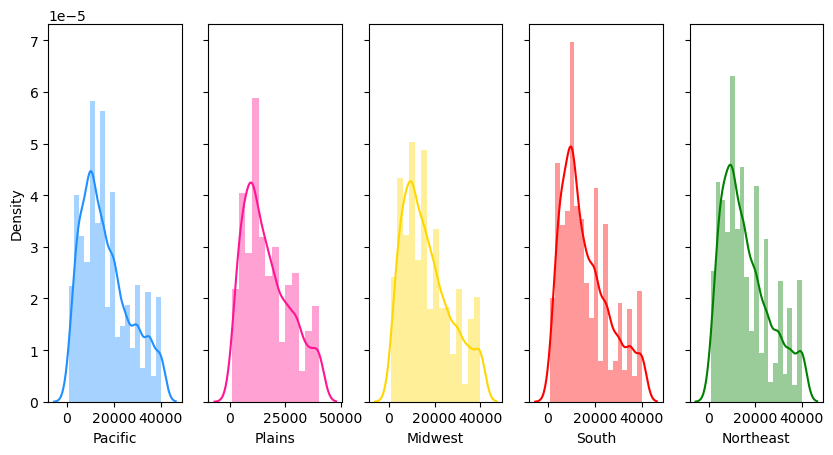

In [154]:
x1 = df_less_nan.loc[df_less_nan.region=='Pacific', ['loan_amount']]
x2 = df_less_nan.loc[df_less_nan.region=='Plains', ['loan_amount']]
x3 = df_less_nan.loc[df_less_nan.region=='Midwest', ['loan_amount']]
x4 = df_less_nan.loc[df_less_nan.region=='South', ['loan_amount']]
x5 = df_less_nan.loc[df_less_nan.region=='Northeast', ['loan_amount']]

# plot
fig, axes = plt.subplots(1, 5, figsize=(10, 5), sharey=True, dpi=100)
sns.distplot(x1 , color="dodgerblue", ax=axes[0], axlabel='Pacific')
sns.distplot(x2 , color="deeppink", ax=axes[1], axlabel='Plains')
sns.distplot(x3 , color="gold", ax=axes[2], axlabel='Midwest')
sns.distplot(x4 , color="red", ax=axes[3], axlabel='South')
sns.distplot(x5 , color="green", ax=axes[4], axlabel='Northeast')
#plt.xlim(50,75);

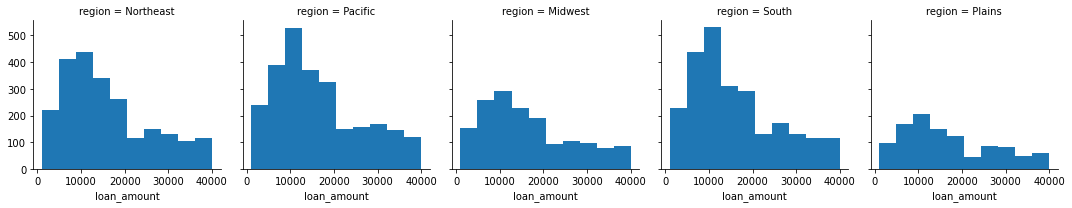

In [155]:
g = sns.FacetGrid(df_less_nan, col='region')
g.map(plt.hist, "loan_amount")